# Fake Review Generation on the Yelp Dataset

More information on the Yelp dataset: https://www.yelp.com/dataset

In [1]:
!python3 -V

Python 3.8.15


In [2]:
!pip3 install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install transformers
!pip install fastai==2.2.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1 MB 1.3 MB/s eta 0:04:18tcmalloc: large alloc 1147494400 bytes == 0x39c5a000 @  0x7fac4cb1f615 0x5d631c 0x51e4f1 0x51e67b 0x4f7585 0x49ca7c 0x4fdff5 0x49caa1 0x4fdff5 0x49ced5 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x5d7c18 0x5d9412 0x586636 0x5d813c 0x55f3fd 0x55e571 0x5d7cf1 0x49ced5 0x55e571 0x5d7cf1 0x49ec69 0x5d7c18 0x49ca7c 0x4fdff5 0x49ced5
     |█████████████████████████████▏  | 1055.7 MB 1.2 MB/s eta 0:01:24tcmalloc: large alloc 1434370048 bytes == 0x7e2b0000 @  0x7fac4cb1f615 0x5d631c 0x51e4f1 0x51e67b 0x4f7585 0x49ca7c 0x4fdff5 0x49caa1 0x4fdff5 0x49ced5 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x5d7c18 0x5d9412 0x586636 0x5d813c 0x55f3fd 0x55e571 0x5d7cf1 0x49ced5 0x55e571 0x5d7cf1 0x49ec69 0x5d7c18 0x49ca7c 0x4fdff5 0x49ced5
     |█████

In [3]:
import gc
import torch
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
from fastai.text.all import *

In [4]:
print(torch. __version__)

1.7.1+cu110


In [5]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
#!tar -xvf /content/drive/MyDrive/YelpDataset/yelp_dataset.tar

In [6]:
!ls /content/drive/MyDrive/YelpDataset/dataframes

AutoDF.pkl		     HealthMedicalDF.pkl  restaurantDF.pkl
beautyandSpaDF.pkl	     HomeServicesDF.pkl   shoppingDF.pkl
EventPlanningServicesDF.pkl  LocalServicesDF.pkl
foodDF.pkl		     NightlifeDF.pkl


In [ ]:
#%cp /content/yelp_academic_dataset_review.json /content/drive/MyDrive/YelpDataset

In [7]:
#%cp /content/drive/MyDrive/YelpDataset/yelp_academic_dataset_review.json /content/
%cp /content/drive/MyDrive/YelpDataset/dataframes/shoppingDF.pkl /content/

In [8]:
import pandas as pd

In [10]:
df = pd.read_pickle('shoppingDF.pkl')

In [11]:
df.shape

(338700, 15)

In [12]:
#process the yelp dataset in similar fashion to the amazon review dataset.
#we'll only need the text coloumn in our case
df_main = df[['text']]

In [13]:
df_main = df_main.rename(columns={'text': 'reviewText'})

In [14]:
df_main.head()

,reviewText
91810,This has become my go to place for shoes. I am a rewards member and they often send me coupons and notices about their sales. The best sale they have is the BOGO 1/2 off plus 15% off. That is a great time to stock up on shoes especially if you have a coupon on top of that. \n\nOther reviewers have complained about the return policy and I must say that I have never attempted to return anything at this store so I can't really comment on that. I guess that is just something to be aware of before making a purchase. \n\nThis store also may not have your size for the shoe you want but the...
91811,"Oh, I do enjoy Famous Footwear. \n\nThe occasional bogo 50% off.\n\nThe clearance is impressive; I usually get a pretty good deal (though they recently redid this area and it's more difficult to shop now because it's hard to see the shoes). \n\nThe associates at this location are ideal. They don't interrupt your shopping experience to ask if you need anything when you clearly are doing just fine. They get you through the register in a jiffy.\n\nDefinitely join the rewards program - I have a $5 credit every 2nd or 3rd time I go there. I believe they send a birthday reward, too."
91812,"Wedged between two meetings on the northside, I had an hour to kill and needed somewhere new to make my mini office. I wasn't in the mood to hit Starbucks for the second to this week, so I welcomed the alternative option found in B&N. \n\nWhat to expect:\n-Starbucks tucked in the corner with plenty of tables \n-all of the stationary, books and magazines you could hope for \n-an obnoxiously loud after school crowd\n-friend Starbucks staff handing out samples \n-a generous number of outlets making the space perfect for hours"
91813,"Love going to this bookstore. It's always nice and well kept and the staff is friendly. Cashiers regularly talk to me about my purchases and the staff has asked me numerous times if I need help finding books I'm looking for. It's also a pretty large store so they have a lot of books to choose from and it seems like they always have deals. They do have a cafe inside if you'd like to get something to drink while reading. I'm sure it's not too much different from other B&N's but I really enjoy this one, and the people who work there!"
91814,The staff is really helpful impatient especially when you don't know what title you need. It's great that they're spaces that you can review books and read a little bit of the book to see if you will truly enjoy it. The bathrooms are a little unkept.


In [15]:
df_main.shape

(338700, 1)

In [16]:
#sample_size = len(df_main)

In [17]:
#we sample 100,000 since we sampled 5% for restaurants which gave us around 188k samples
sample_df = df_main.sample(n=100000, random_state=2021).dropna().reset_index()

In [18]:
sample_df.dtypes

index          int64
reviewText    object
dtype: object

In [19]:
del df_main
gc.collect()

19

In [20]:
sample_df.shape

(100000, 2)

In [21]:
#Let's import the pretrained GPT2 model and the tokenizers
pretrained_weights = 'gpt2'
tokenizer = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model = GPT2LMHeadModel.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

In [22]:
device = torch.device("cuda")

In [23]:
model.to(device)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dro

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df_train, df_valid = train_test_split(sample_df, random_state=2021, test_size=0.1)

In [26]:
all_texts = np.concatenate([df_train["reviewText"].values, df_valid["reviewText"].values])

In [27]:
all_texts.shape

(100000,)

In [28]:
e = 0
toRemove = []
for i in range(len(all_texts)):
  if all_texts[i]=="":
    e+=1
    print(f"all_texts[{i}] is empty")
    all_texts[i] = 'a'
    toRemove.append(i)

print(f"Number of rows that are empty={e}. To remove indecies={toRemove}")

Number of rows that are empty=0. To remove indecies=[]


In [29]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [30]:
splits = [list(df_train.index), list(df_valid.index)]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)

In [31]:
"""e = 0
for i in range(len(tls.train)):
  if tls.train[i].type() != 'torch.LongTensor':
    #print(f'tls.train[{i}] not a long tensor')
    #print(f'tls.train[{i}] is a {tls.train[i].type()}')
    e+=1
print("Total of e=",e," empty")"""

'e = 0\nfor i in range(len(tls.train)):\n  if tls.train[i].type() != \'torch.LongTensor\':\n    #print(f\'tls.train[{i}] not a long tensor\')\n    #print(f\'tls.train[{i}] is a {tls.train[i].type()}\')\n    e+=1\nprint("Total of e=",e," empty")'

In [32]:
tls.tfms(tls.train.items[0]).shape, tls.tfms(tls.valid.items[0]).shape

(torch.Size([46]), torch.Size([126]))

In [33]:
show_at(tls.train, 0)

Liars.......I drove 80 miles to see a used car that they said was perfect..........other than needing $3-$5000 in body work, it was perfect....Bastards. ....don't trust PAT or Mario


In [34]:
show_at(tls.valid, 0)

So incredibly happy with this store... (This store is  in the same location as the old Ace hardware store... in some ways similar, but in most ways incredibly better.)  first off, let's start out with an overview of the store this is my first time into a BIG R... And I must say I was really impressed lots of good quality items and very reasonable prices. So if you're looking for hardware, plumbing, ranch or farm supplies or just looking for a great quality coat or coveralls this is the store.  All the employees that I met were fantastic and I am already looking forward to going back!


In [35]:
bs,sl = 4,200
dls = tls.dataloaders(bs=bs, seq_len=sl, device=device)

Token indices sequence length is longer than the specified maximum sequence length for this model (1125 > 1024). Running this sequence through the model will result in indexing errors


In [36]:
dls.show_batch(max_n=2)

,text,text_
0,"Jenn is amazing. She is always punctual, the studio is cozy and inviting, and Jenn does an amazing job. I have been going to Jenn for over a year for my lash extensions and she does a great job. I would highly recommend her for anyone that is thinking about getting extensions.If you need supplies for a party, then this is the place! There was a great selection of plates and silverware and cups and napkins and everything you can possibly imagine! \n\nPurple was my color of choice, to match my shirt, so we were able to get everything color coordinated! Later, I realized the true proper color for a Yelp party is red. Oops!\n\nThanks Party City!I had my wedding reception at Mad Art in early August 2012. It is a really cool, funky space which I really liked. However, I had Mad Art do the catering and it was","is amazing. She is always punctual, the studio is cozy and inviting, and Jenn does an amazing job. I have been going to Jenn for over a year for my lash extensions and she does a great job. I would highly recommend her for anyone that is thinking about getting extensions.If you need supplies for a party, then this is the place! There was a great selection of plates and silverware and cups and napkins and everything you can possibly imagine! \n\nPurple was my color of choice, to match my shirt, so we were able to get everything color coordinated! Later, I realized the true proper color for a Yelp party is red. Oops!\n\nThanks Party City!I had my wedding reception at Mad Art in early August 2012. It is a really cool, funky space which I really liked. However, I had Mad Art do the catering and it was"
1,"setting. I am very happy with the finished product. He rushed it to make it on Valentines Day. I will only trust to buy diamonds with Abbott Taylor. Staff were very polite and accommodating. Since my future husband knows I'm picky, he highly recommend Abbot Taylor. We were very happy with the workmanship.\n\nElsa B.The absolute worst experience with a doctor's office I have ever experienced. I went to be fitted for contacts in January 2016. It is now mid way thru March and I still haven't received my final lenses. They miss fit them twice and rescheduled visits 4 times because they can't seem to get the ordered replacement lenses delivered on time. When I have been in for appointments I usually have had to wait 30 minutes or more from my scheduled appointment start time, before they finally call me back. On one visit we waited in","setting. I am very happy with the finished product. He rushed it to make it on Valentines Day. I will only trust to buy diamonds with Abbott Taylor. Staff were very polite and accommodating. Since my future husband knows I'm picky, he highly recommend Abbot Taylor. We were very happy with the workmanship.\n\nElsa B.The absolute worst experience with a doctor's office I have ever experienced. I went to be fitted for contacts in January 2016. It is now mid way thru March and I still haven't received my final lenses. They miss fit them twice and rescheduled visits 4 times because they can't seem to get the ordered replacement lenses delivered on time. When I have been in for appointments I usually have had to wait 30 minutes or more from my scheduled appointment start time, before they finally call me back. On one visit we waited in the"


### Fine Tuning 

In [37]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [38]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()

In [39]:
learn.validate()

(#2) [3.8030471801757812,44.83760452270508]

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.14454397559165955)

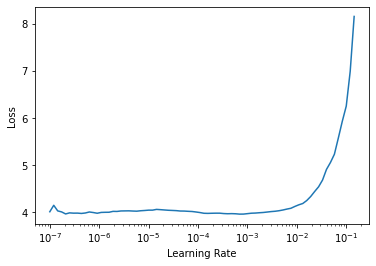

In [40]:
learn.lr_find()

In [41]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,perplexity,time
0,3.460991,3.364388,28.915781,46:53


A perplexity of 100 means that whenever the model is predicting the next word, the model is as confused as if it had to pick between 100 different words

In [42]:
#save model weights. Commented out since we don't need it now
learn.save("gpt2-finetuned-yelp-reviews-sample-1cycle-Shopping")

Path('models/gpt2-finetuned-yelp-reviews-sample-1cycle-Shopping.pth')

In [45]:
%cp /content/models/gpt2-finetuned-yelp-reviews-sample-1cycle-Shopping.pth /content/drive/MyDrive/YelpDataset/

In [46]:
df_valid.head(1)

,index,reviewText
23307,2128947,Lush is the number one place to go if you want to buy a gift for yourself or for someone else. All of their products are natural and smell delicious like I want to taste all of it but don't! I will warm you if you sniff the bath bombs be careful because they can leave a crusty white film under your nose.... which may cause strangers to give you funny looks. Anyways the customer service in this place is epic. If you have questions they have answers. If your in a last minute pinch because your husband forgot it's was administrative assistant day and he didn't by her anything and sends his wi...


### Review Example 1

In [51]:
prompt = "Not satisfied with the dress"

In [52]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 5])

In [53]:
preds = learn.model.generate(inp, max_length=40, num_beams=5, temperature=0.75, early_stopping=True, no_repeat_ngram_size=2)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [54]:
tokenizer.decode(preds[0].cpu().numpy())

"Not satisfied with the dress I ordered and will not be ordering from them again.I've been going here for years and I've never had a bad experience. The staff is always friendly and helpful."

### Review Example 2



In [55]:
prompt = "The tshirt"

In [56]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 3])

In [57]:
preds = learn.model.generate(inp, max_length=60, num_beams=5, temperature=0.75, early_stopping=True, no_repeat_ngram_size=2)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [58]:
tokenizer.decode(preds[0].cpu().numpy())

'The tshirt I ordered was not in stock, so I called the store to see if they could order it for me. They told me it would be ready in a few days, and that they would ship it to me within a week. \n\nWhen I got home, I realized that'

### Review Example 3



In [59]:
prompt = "The shopping bags"

In [60]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 3])

In [61]:
preds = learn.model.generate(inp, max_length=60, num_beams=5, temperature=0.75, early_stopping=True, no_repeat_ngram_size=2)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [62]:
tokenizer.decode(preds[0].cpu().numpy())

'The shopping bags are a bit overpriced, but the quality of the items is worth it. \n\nThe staff is very friendly and helpful, and the store is clean and well organized. I would recommend this store to anyone who is looking for a unique gift for someone special.This place is'

### Review Example 4



In [63]:
prompt = "The staff was helpful"

In [64]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 4])

In [65]:
preds = learn.model.generate(inp, max_length=500, num_beams=10, temperature=0.75, early_stopping=True, no_repeat_ngram_size=5)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [66]:
tokenizer.decode(preds[0].cpu().numpy())

"The staff was helpful and friendly. The store was clean and well organized. \n\nI would definitely recommend this store to anyone looking for a unique gift for a loved one.I've been going here for a few years now and I've always had a great experience. The staff is always friendly and helpful and the prices are very reasonable. I've never had a bad experience here and I've always been happy with the service I've received. \n\nThe only reason I don't give this place 5 stars is because they don't have what I'm looking for. They don't have anything that I'm looking for and they don't have anything I'm looking for at all. \n\nIf you're looking for something specific, they don't have it. If you're looking for a specific item, they don't even have it. They just don't have what you're looking for. \n\nThey also don't have everything I'm looking for, so if you're looking for anything specific, they won't be able to find it. \n\nOverall, this is a great place to go if you're looking to find so